## Exercise 1: Out Of Vocabulary Words (3.5 points)

As you saw in the lecture, the higher the number of unseen tokens in your language corpus, the higher the OOV rate. In this exercise, you will calculate the OOV rate for different languages for different vocabulary sizes. For each corpus, preprocess the data by lowercasing the text and applying tokenisation. Since there isn't any standard tokeniser that will work on all the languages, we recommend that you write your own function called `preprocess` in `exercise_1.py`.

### 1.1 Preprocess data (0.5 points)

Preprocess the data and partition it in a 70-30% train-test split. For this, write your own function `train_test_split_data` in `exercise_1.py`. You may modify the function signature and the code in the cell below appropriately.

In [ ]:
import sys
sys.path.append('/content/exercise_1.py')

from importlib import reload
import os
import exercise_1
exercise_1 = reload(exercise_1)

# Walk through the data directory and read all the corpora
# For each corpus, read the text, preprocess it and create the train test split for each language

corpora = {} # To save the respective corpora
file_path = "/content/data"
files = [f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))]

for file in files:
# TODO: Add a loop over each file
    f = open(os.path.join(file_path, file), "r")
    text = f.read()
    #TODO: preprocess text
    pp = exercise_1.preprocess(text)
    #TODO: Add respective splits to the corpora dict
    train, test = exercise_1.train_test_split_data(pp, test_size=0.3)
    corpora[file] = (train, test)



### 1.2 Calculate OOV rates (1.5 points)
For every language, construct a vocabulary by taking the 15000 most frequent tokens in the training set. Compute the OOV rate for vocabulary sizes 1k, 2k, ..., 15k. Implement this in the function `get_oov_rates` in `exercise_1.py`.

In [ ]:
oov_rates = {}
for lang, (train, test) in corpora.items():
    oov_rates[lang] = exercise_1.get_oov_rates(train, test)

### 1.3 Plotting OOV rates (1 point)
* Using the loglog scale, plot the OOV rate against the vocabulary size for all the languages in a single plot. Make sure your legend identifies the languages appropriately and you label the axes.

* Describe your observations in 3-4 sentences.

length of the dictionary 4
 plotting language  corpus.ta
 plotting language  corpus.en
 plotting language  corpus.fi
 plotting language  corpus.ru


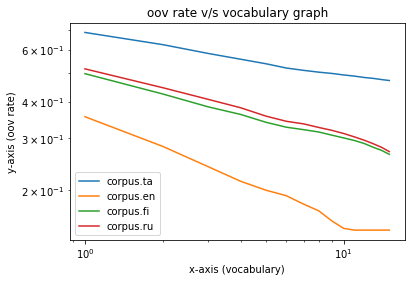

In [ ]:
exercise_1.plot_oov_rates(oov_rates)

### 1.4 Handling OOV words (0.5 points)
* Before applying smoothing and backing-off models, we need to take care of the OOV words. Suggest 2 techniques to handle Out-Of-Vocabulary words your corpus.
* What are the advantages and disadvantages of each?

## Exercise 1: Answers

$1.3$ We can observe that with increase in vocabulary frequency, the oov rate decreases for all languages. The oov rate for corpus.ta is higher than all other languages and the oov rate for corpus.en is lower than others.

$1.4$ Following are the two techniques to handle oov words:

      1. Make sure that all oov words in training set has some probability other than zero.
      2. Assign the synonym of OOV words present in the training corpus

Advantage of it is that there is no need of smoothing and disadvantage of it is that there will be less accuracy in language model.

## Exercise 2: Smoothing (4 points)

### 2.1 Additive smoothing (1 point)

In the last assignments we largely ignored the issue of unseen words, i. s. words that are not in the train set/observed data but part of the test set. A very simple method to account for unseen words is [additive smoothing](https://en.wikipedia.org/wiki/Additive_smoothing). It assigns a small 'pseudo-count' to all unseen words AND to the words already in the language model, and then uses the updated counts to estimate the n-gram probabilities. The formula for unigram probabilities is:
\begin{equation}
p(w_i) = \frac{C(w_i) + \alpha}{N + \alpha |V|}
\end{equation}

Where
* $C(w_i)$ is the empirical count of the unigram $w_i$
* $N$ is the number of unigrams in the train set
* $|V|$ is the size of the vocabulary after smoothing
* $\alpha$ is the additive count.

If $\alpha = 1$ this is known as *Laplace* smoothing, if $0 < \alpha < 1$ *Lidstone* smoothing.

1. How would you estimate the bigram probability $p(w_i|w_{i-1})$ and the general case $p(w_i|w_{i-1}, ..., w_{n-i+1})$? Explain each part of the formula. (0.5 points)
2. Is it a good idea to set $\alpha$ to 1? What could be a more reasonable value, and why? (0.5 points)

### 2.2 Language model class (3 points)

Until now, you have implemented language models as a series of Python functions. We have provided to you a class skeleton in `lm.py` that should do all the tricks you need to estimate a language model. You will use the same corpora and train/test split as in Exercise 1.

1. Complete the implementation of the `LanguageModel` class. You may estimate the parameters of the language model as you like, but the method `perplexity` should perform the perplexity calculation (as in the below code block), and the method `lidstone_smoothing` should smooth the data. You may define new methods or change the signatures of existing ones, as long as you comment on your changes. Make sure that the relative frequencies and the conditional probabilities for each history sum up to 1. (1.5 points)

2. Choose $\alpha = 1$. Then, estimate $N = 1,2,3$ language models for the corpora from Exercise 1, and plot perplexity vs. $n$ for each of them. Do so by implementing the function `plot_pp` in `exercise_2.py` Do you observe any differences between the languages? Explain what you see in 3-4 sentences. (1 point)


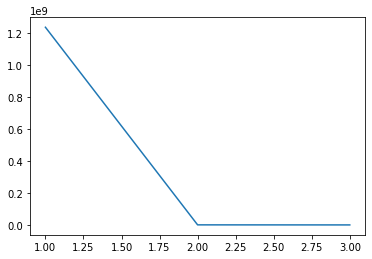

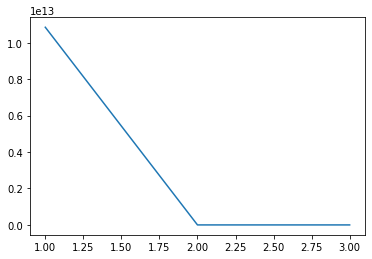

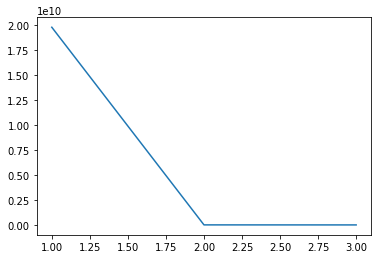

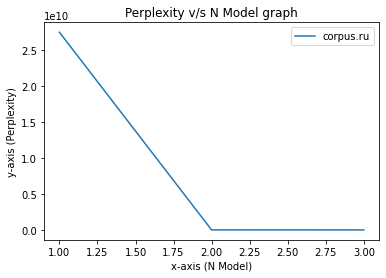

In [ ]:
from importlib import reload
import lm
import exercise_2
lm = reload(lm)
exercise_2 = reload(exercise_2)

N = 3

PPs = {}

i = 1
for lang, (train, test) in corpora.items():
  LM = lm.LanguageModel(train, test, N=N, alpha=1)
  perplexity_list = []
  for i in range(N):
      LM.i = i + 1
      # TODO: calculate perplexity
      pp = LM.perplexity(i + 1)
      perplexity_list.append(pp)

  PPs[lang] =  perplexity_list


exercise_2.plot_pp(PPs)

3. Now, find a good value for $\alpha$ for the *English* corpus. Do so by estimating $K=100$ trigram language models with $\alpha = 0.0, 0.01,...,0.99,1.0$, and plot trigram perplexity vs. increasing $\alpha$. You can write the code for the loop in the code cell below, the plotting code should be in `plot_pp_vs_alpha` in `exercise_2.py`. Does the $\alpha$ coincide with your estimate in 2.1.2? (0.5 points)

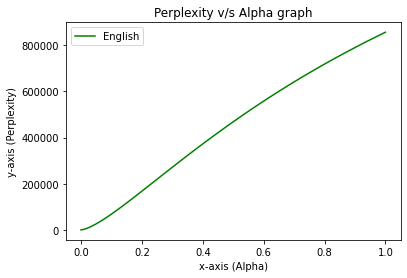

In [ ]:
# only for 1 langauge?
lang = "corpus.en"

N = 3
K = 100

PPs = []

# TODO: Loop
alpha = 0.00

for i in range(K+1):
    LM = lm.LanguageModel(train, test, N=3, alpha=alpha)
    LM.i = 3
    pp = LM.perplexity(N)
    PPs.append(pp)
    alpha += 0.01

alphas = [alpha/100 for alpha in range(100+1)]
exercise_2.plot_pp_vs_alpha(PPs, alphas)

## Exercise 2: Answers

$2.1$ \\
$1.$ Probabilty for bigram model can be represented as below :
$
p(w_{i} | w_{i-1}) = \frac{C(w_{i-1}, w_{i})}{C(w_{i-1})}
$

and Probability for smoothed bigram model is given by :
$
p(w_{i} | w_{i-1}) = \frac{C(w_{i-1}, w_{i}) + \alpha}{C(w_{i-1}) + \alpha|V|}
$

Similaryly, probability for smoothed n-gram model is given by:
$
p(w_{i}|w_{i-1},...,w_{n-i+1}) = \frac{C(w_{n-i+1},...,w_{i-1}, w_{i}) + \alpha}{C(w_{n-i+1},...,w_{i-1}) + \alpha|V|}
$

$2.$ It is not a good idea to set the value of $\alpha$ equal to 1 because it will assign heavy weightage to unseen tokens. The ideal value of \alpha should be between 0 and 1

$2.2$ \\
There is no major differences between the languages. For all the languages, graph has same curve.

$2.3$ \\
Yes $\alpha$ coincide with our estimates



## Exercise 3: Misc. (2.5 points)

## 3.1 Smoothed perplexity (1 point)

Assume you trained (MLE) an n-gram language model on datasets $D_\text{train}$ and $D_\text{test}$. You measure perplexities $p_{1,\text{train}}$ and $p_{1,\text{test}}$ respectively. You then smooth your n-gram language model and evaluate again on the two datasets, resulting in $p_{2,\text{train}}$ and $p_{2,\text{test}}$. Answer the following question with brief comments (e.g. _"X is always greater than Y because .."_). For a language model $p$, test perplexity can, for example, be computed as $2^{\frac{-1}{|D_\text{test}|} \sum_{w \in D_\text{test}}\log p(w|h)}$ and train perplexity as $2^{\frac{-1}{|D_\text{train}|} \sum_{w \in D_\text{train}}\log p(w|h)}$.

1. What is the relation of $p_{1,\text{train}}$ and $p_{1,\text{test}}$?
2. What is the relation of $p_{2,\text{train}}$ and $p_{2,\text{test}}$?
3. What is the relation of $p_{1,\text{train}}$ and $p_{2,\text{train}}$?
4. What is the relation of $p_{1,\text{test}}$ and $p_{2,\text{test}}$?
5. How does $n$ size affect the perplexities?

## 3.2 Infinite smoothing (0.5 points)

What distribution would you get if you applied additive or absolute discounting (choose one) smoothing infinitely? e.g. if $F_\text{smooth}$ is a function that smooths a language model (either additive or absolute discounting) and $\text{lm}^{(n+1)} = F_\text{smooth}(\text{lm}^{(n)})$. What will the language model $\lim_{n\rightarrow \infty} \text{lm}^{(n)}$ look similar to?

## 3.3 Convex combination of LM models (1 point)

Consider the following quantity based on two independent language models $p_1$ and $p_2$.

$f_3(w|h) = \beta_1\cdot p_1(w|h) + \beta_2\cdot p_2(w|h)$ where $\beta_1 + \beta_2 = 1$ and $\beta_1 \ge 0, \beta_2 \ge 0$

- Is it still a language model (probability distribution given history $h$)? Show that all properties hold or find a counterexample for each: (1) non-negativity, (2) summation to 1 and (3) $\sigma$-additivity. See [Wikipedia - Probability Axioms](https://en.wikipedia.org/wiki/Probability_axioms). (0.5 points)
- What would be the possible gain of using the given function as a language model? (0.5 points)

## Exercise 3: Answers

## 3.1 Smoothed perplexity

1. $p_{1,\text{train}}$ lesser than $p_{1,\text{test}}$ because the Training Dataset will hold more information than the Test Dataset as the Test Dataset may contain few unseen n-gram tokens, which will have a Probability of 0.
2. $p_{2,\text{train}}$ lesser than $p_{2,\text{test}}$ because the Training Dataset will hold more information than the Test Dataset as the Test Dataset may contain few unseen n-gram tokens, but they will have some Probability and not 0, so the difference maybe smaller between $p_{2,\text{train}}$ lesser than $p_{2,\text{test}}$ as compared to $p_{1,\text{train}}$ lesser than $p_{1,\text{test}}$.
3. $p_{1,\text{train}}$ lesser than $p_{2,\text{train}}$ because after smoothing we take into account the unseen tokens also in the Training Dataset there will be an increment in the Probability from zero to some value hence causing a slight increment in the Perplexity after smoothing
4. $p_{1,\text{test}}$ equal $p_{2,\text{test}}$ because the smoothing is applied to the Training Dataset, so this will not change.
5. The increase in the $n$ of the n-gram model with reduce the Perplexity of the Model.

## 3.2 Infinite smoothing

If you applied Additive Smoothing infinitely to a model, then $F_\text{smooth}$ is a function that smooths a language model and $\text{lm}^{(n+1)} = F_\text{smooth}(\text{lm}^{(n)})$, then the continous smoothing of the model will result in uniform distribution of the probability mass function.


## 3.3 Convex combination of LM models

Two independent language models $p_1$ and $p_2$.

$f_3(w|h) = \beta_1\cdot p_1(w|h) + \beta_2\cdot p_2(w|h)$ where $\beta_1 + \beta_2 = 1$ and $\beta_1 \ge 0, \beta_2 \ge 0$

- Yes, it is still a language model given history $h$ as all the properties hold true.

(1) non-negativity
    As we know that $P(a) >= 0$ probability is always greater or equal to $0$
    $f_3(w|h) = \beta_1 \cdot p_1(w|h) + \beta_2\cdot p_2(w|h)$ where $\beta_1 + \beta_2 = 1$ and $\beta_1 \ge 0, \beta_2 \ge 0$
    $\beta_1 and \beta_2$ are both non negative as given
    $\cdot p_1(w|h) and \cdot p_2(w|h)$ are both non negative as Probability can't be negative.
    
    $f_3(w|h) = non-negative * non-negative + non-negative * non-negative = non-negative$
    
(2) summation to 1

If we consider the Probability of word w given h is the same for two LM then

$f_3(w|h) = \beta_1 + \beta_2 (\cdot p(w|h)) = 1$ as $\beta_1 + \beta_2 = 1$

(3) $\sigma$-additivity
    
  $P(\bigcup_{i=1}^{\infty} E_i) = \sum_{i=1}^{\infty}P(E_i)$
    
As this holds for all disjoint set

- The gain of using the given function as a LM is that, we have already done smoothing to both the independent Language Models and thus will form a better trained language Model for combining for multiple separate models.

## Bonus (1 point)

Read about the following special language models techniques. The provided links shold only serve as a starting point.



#### 1. [Neural language models](https://en.wikipedia.org/wiki/Language_model#Neural_network) (0.5 points)

- Describe (~5 sentences or bullet points) the working, advantages and disadvantages of NLM.

#### 2. [Class-based language models](https://www.cs.cmu.edu/~roni/11761/PreviousYearsHandouts/classlm.pdf) (0.5 points)

- What is a class-based language model?
- What issues does it address?
- Can we utilize the output for something more than just language modelling (think about other NLP problems and classes you took)?

<!-- #### 2. [Decoding](https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/) (0.5p)

- What issues does beam search in the context of text generation using language models solve? -->
 <!-- and . Be specific and practical in your answers and support your arguments with evidence.  -->

## Bonus : Answers

#### 1. [Neural language models](https://en.wikipedia.org/wiki/Language_model#Neural_network)

- NLM uses a continuous embebbings of words to make the predictions.
- Embedding are used to preserve the context of the word.
- It has two bi-directional RNNs (Recurrent Neural Networks) trained for language modelling. Layer 1 to capture left to right context and second layer to capture the right to left context. This is concatenated to store the complete context of the word.
- Advantages
    - NLM have a higher predictive accuracy than similar size of n-gram LM
    - NLM are more efficient than the n-gram LM as we can work with longer contectual histories
    - We can also generalize NLM over contexts of similar words.
- Disadvantges
    - They are complex to implement
    - They take longer to train the Model as we have to pass input data sequentially

#### 2. [Class-based language models](https://www.cs.cmu.edu/~roni/11761/PreviousYearsHandouts/classlm.pdf)

- Class-based Language Model is when we group the words with similar meaning or syntactic functions. We partition the Vocabulary $V$ words into $C$ classes using a function $f$, which maps a word $w_i$ into its class $c_i$.

- The Classification can be based on same morphologicak stem or those words which are sematically related but different stems.

- As there is no practical method for efficiently identifying a Partition which maximizes the Average Mutual Information (AMI). Even if we obtain such a partition, we can not verify it to maximize.

- The Closest result according to the Paper is with Greedy Algorithm only uptill 5000 words Vocabulary. Where each word is assigned to a distinct class and then AMI between adjacent classes. Then merging classes with least loss in AMI. This method helps to increase the Mutual Information by moving the words between classes.

Average Mutual Information Loss :  $L_k(i,j) ≡ I_k + I_k(i,j)$

-  After derving a set of classes from successive merges, Cycling through the vocabulary and moving the words in between classes and find the resulting partition which has the greatest AMI. A point is reached when no reassignment leads to a greater AMI.

- We can have simultaneous reassigning of multiple words, but such a search will be infeasible due to high cost of implementation.

<!--  This algorithm is for finding clusters, If we continue merging then we will have a single cluster which is just the complete vocabulary. The order in which cluster mergers, determines a binary tree. Root corresponds to a single cluster and the leaves to words. Intermediate nodes to Clustering. Similar words  are closer in the tree. -->

<!-- For Vocabulary larger than 5000, we sort the words by frequency. Then assign each of the first C words to distinct class. Then assign $(C+1)^st$ most probable word to a new class, then merge that pair among the resulting $C+1$ classes for which the loss in AMI is least. Continue it till $k^th$ step and merge, to restore the number of classes to $C+1$ by mergeing the pair for which the loss is least in AMI.  -->

- It addresses the issue of the size of the Vocabulary, if beyond 5000, its hard to do the partitioning. Also there's no optimum Algorithm for maximizing the Average Mutual Information.

- The class based modelling can be  for Realtime Closed captioning of TV Ice-hockey Commentaries